In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import os
%matplotlib inline

In [2]:
os.chdir(os.path.normpath(os.path.expandvars('$HOME/heeps_metis/output_files')))
band = 'L'
cube_duration = 3600    # s
cube_samp = 0.3         # s
lat = -24.59            # deg
dec = -5                # deg
ang_sep = 100           # mas
dit = 0.3               # detector integration time in s
flux_mag0 = 8.999e+10   # [e-/s] HCI-L long, mag 0 (Jan 21, 2020)

### Parallactic angle

min = 160.54°, max = 199.46°


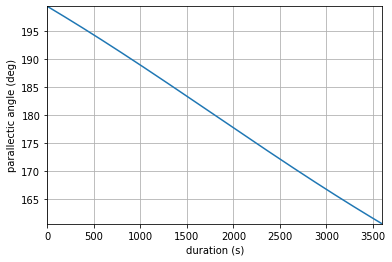

In [3]:
# hour angles
ha = cube_duration/3600/24*360
# angles in rad
ncube = int(cube_duration/cube_samp)
hr = np.deg2rad(np.linspace(-ha/2, ha/2, ncube))
dr = np.deg2rad(dec)
lr = np.deg2rad(lat)
# parallactic angle in deg
pa = -np.rad2deg(np.arctan2(-np.sin(hr), np.cos(dr)*np.tan(lr)
     - np.sin(dr)*np.cos(hr)))
pa = (pa + 360)%360 
pa_rad = np.deg2rad(pa)
plt.plot(np.arange(ncube)*cube_samp, pa)
plt.xlim(0,cube_duration)
plt.ylim(min(pa),max(pa))
plt.xlabel('duration (s)')
plt.ylabel('parallectic angle (deg)')
plt.grid(True)
print('min = %.2f°, max = %.2f°'%(min(pa), max(pa)))

### Planet trajectory

In [4]:
xy = np.array([ang_sep*np.cos(pa_rad), ang_sep*np.sin(pa_rad)]).T
fits.writeto('point_planet/point_planet_%ss_%sms_%s.fits'%(cube_duration, 
        int(cube_samp*1e3), band), np.float32(xy), overwrite=True)

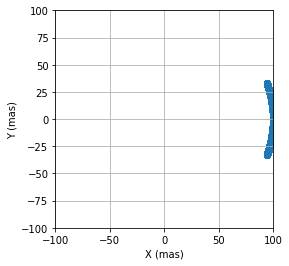

In [5]:
plt.scatter(-xy[:,0], -xy[:,1])
plt.axis('square')
xy_max = np.ceil(np.max(abs(xy)))
plt.xlim(-xy_max, xy_max)
plt.ylim(-xy_max, xy_max)
plt.xlabel('X (mas)')
plt.ylabel('Y (mas)')
plt.grid(True);

### Load star cube (mag=5)

In [6]:
star = fits.getdata('scao_only/onaxis_PSF_L_RAVC.fits')
mag_star = 5
star *= dit * flux_mag0 * 10**(-0.4*mag_star)

### Add planet mag=12.5

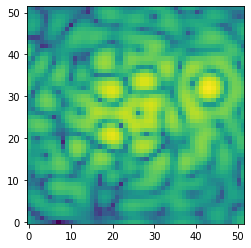

In [7]:
planet = fits.getdata('point_planet/onaxis_PSF_L_RAVC.fits')
mag_planet = 12.5
planet *= dit * flux_mag0 * 10**(-0.4*mag_planet)
plt.imshow(np.log(star[0,120:172,120:172] + planet[0,120:172,120:172]), origin='lower');

### Add planet mag=20

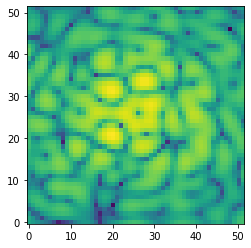

In [8]:
planet = fits.getdata('point_planet/onaxis_PSF_L_RAVC.fits')
mag_planet = 20
planet *= dit * flux_mag0 * 10**(-0.4*mag_planet)
plt.imshow(np.log(star[0,120:172,120:172] + planet[0,120:172,120:172]), origin='lower');